# **Projet QoE ‚Äì S√©ance 1 : Data Exploration**
pr√©dire la Qualit√© d‚ÄôExp√©rience (QoE) vid√©o √† partir de mesures de trafic r√©seau chiffr√©, sans inspecter le contenu de la vid√©o.

L'objectif de ce projet est de d√©velopper des mod√®les de Machine Learning capables de pr√©dire des indicateurs de Qualit√© d‚ÄôExp√©rience (QoE) tels que le ITU MOS, le startup delay, ou encore la r√©solution vid√©o, en se basant uniquement sur les caract√©ristiques r√©seau extraites de trafic chiffr√©, dans un contexte de streaming vid√©o (ex. YouTube).

In [7]:
import pandas as pd

# Charger les noms de colonnes
with open("column-names.txt", "r") as f:
    column_names = [line.split('|')[1].strip() for line in f.readlines() if '|' in line]

# Charger le dataset avec les colonnes
df = pd.read_csv("dataset.csv", header=None, names=column_names)

# Afficher les premi√®res lignes
df.head()


Field           videoID  category  bitrates_144p  bitrates_240p  \
0  NeZ8BQBl8NA  Film & Animation     67101          63551         123054   
1  FWpRqKpV0rY         Education     76305         111936         204952   
2  n72yt5hc3-A   Travel & Events     91757         123729         195255   
3  v0_uAqzWlUM            Sports     91222         162811         305089   
4  aD3Ahnee0Ck  Film & Animation    104747         223032         411669   

   bitrates_360p  bitrates_480p  bitrates_720p  bitrates_1080p  join_time  \
0         205503         422644         824186            3411          0   
1         340239         744420        1683577            2883          0   
2         303189         682584        1385367            4803          0   
3         531184        1191866        2349128          310000          0   
4         682377        1345939        2442657          310000          0   

   ...  QoE_JT  QoE_noStall  QoE_noSwitches  QoE_Linear  QoE_Linear2  \
0  ...       0            0             5.0         5.0          5.0   
1  ...       0            0             5.0         5.0          5.0   
2  ...       0            0             5.0         5.0          5.0   
3  ...       0            0             0.0         0.0          0.0   
4  ...       0            0             0.0         0.0          0.0   

   QoE_Linear3  QoE_LD_SD_HD  QoE_ITU_023  QoE_ITU_035  QoE_ITU_046  
0            2           5.0      4.44397      4.42413          NaN  
1            2           5.0      4.61882      4.58419          NaN  
2            2           5.0      4.58990      4.55993          NaN  
3            0           5.0      4.68886      4.63004          NaN  
4            0          -1.0     -1.00000     -1.00000          NaN  

[5 rows x 271 columns]

***Chargement des donn√©es***

In [8]:
import pandas as pd
import io

# Lire les noms de colonnes depuis le fichier .txt
with open("column-names.txt", "r", encoding="utf-8") as f:
    column_lines = f.readlines()

# Extraction propre des noms de colonnes depuis le format SQL
column_names = [line.split('|')[1].strip() for line in column_lines if '|' in line and 'Field' not in line and '---' not in line]

# Charger le dataset avec les noms de colonnes
df = pd.read_csv("dataset.csv", header=None, names=column_names)

print("Donn√©es charg√©es avec succ√®s")
df.head()


Donn√©es charg√©es avec succ√®s


videoID          category  bitrates_144p  bitrates_240p  bitrates_360p  \
0  NeZ8BQBl8NA  Film & Animation          67101          63551         123054   
1  FWpRqKpV0rY         Education          76305         111936         204952   
2  n72yt5hc3-A   Travel & Events          91757         123729         195255   
3  v0_uAqzWlUM            Sports          91222         162811         305089   
4  aD3Ahnee0Ck  Film & Animation         104747         223032         411669   

   bitrates_480p  bitrates_720p  bitrates_1080p  join_time  stallingNumber  \
0         205503         422644          824186       3411               0   
1         340239         744420         1683577       2883               0   
2         303189         682584         1385367       4803               0   
3         531184        1191866         2349128     310000               0   
4         682377        1345939         2442657     310000               0   

   ...  QoE_JT  QoE_noStall  QoE_noSwitches  QoE_Linear  QoE_Linear2  \
0  ...       1            0               0         5.0          5.0   
1  ...       1            0               0         5.0          5.0   
2  ...       1            0               0         5.0          5.0   
3  ...       0            0               0         0.0          0.0   
4  ...       0            0               0         0.0          0.0   

   QoE_Linear3  QoE_LD_SD_HD  QoE_ITU_023  QoE_ITU_035  QoE_ITU_046  
0          5.0             2          5.0      4.44397      4.42413  
1          5.0             2          5.0      4.61882      4.58419  
2          5.0             2          5.0      4.58990      4.55993  
3          0.0             0          5.0      4.68886      4.63004  
4          0.0             0         -1.0     -1.00000     -1.00000  

[5 rows x 270 columns]

***Exploration initiale***

In [9]:
# Taille du jeu de donn√©es
print(f"Nombre de lignes : {df.shape[0]}")
print(f"Nombre de colonnes : {df.shape[1]}")

# V√©rifier les types de donn√©es
df.info()

# Quelques statistiques descriptives
df.describe().T


Nombre de lignes : 111919
Nombre de colonnes : 270
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111919 entries, 0 to 111918
Columns: 270 entries, videoID to QoE_ITU_046
dtypes: float64(98), int64(170), object(2)
memory usage: 230.5+ MB


count          mean            std  min            25%  \
bitrates_144p  111919.0  8.433258e+04   20668.859700  0.0   80330.500000   
bitrates_240p  111919.0  1.614884e+05   56534.866093  0.0  123167.500000   
bitrates_360p  111919.0  2.969415e+05  105257.645127  0.0  226045.500000   
bitrates_480p  111919.0  5.182005e+05  198978.759166  0.0  374536.000000   
bitrates_720p  111919.0  1.042117e+06  403614.412299  0.0  755894.000000   
...                 ...           ...            ...  ...            ...   
QoE_Linear3    111919.0  3.421945e+00       1.536845  0.0       2.354365   
QoE_LD_SD_HD   111919.0  1.118353e+00       0.848809  0.0       0.000000   
QoE_ITU_023    111919.0  4.701973e+00       1.103947 -1.0       5.000000   
QoE_ITU_035    111919.0  3.508724e+00       1.218091 -1.0       2.888710   
QoE_ITU_046    111919.0  3.477920e+00       1.224797 -1.0       2.812640   

                        50%           75%           max  
bitrates_144p  9.181100e+04  9.694900e+04  2.248400e+05  
bitrates_240p  1.734400e+05  2.089205e+05  9.127370e+05  
bitrates_360p  3.190800e+05  3.848440e+05  1.737032e+06  
bitrates_480p  5.480470e+05  6.891835e+05  2.469066e+06  
bitrates_720p  1.104771e+06  1.388100e+06  6.597562e+06  
...                     ...           ...           ...  
QoE_Linear3    3.929890e+00  4.784930e+00  5.000000e+00  
QoE_LD_SD_HD   1.000000e+00  2.000000e+00  2.000000e+00  
QoE_ITU_023    5.000000e+00  5.000000e+00  5.000000e+00  
QoE_ITU_035    3.816160e+00  4.440985e+00  5.000000e+00  
QoE_ITU_046    3.833200e+00  4.423630e+00  4.922150e+00  

[268 rows x 8 columns]

Analyse des valeurs manquantes

In [10]:
missing = df.isna().sum()
missing[missing > 0].sort_values(ascending=False)


category    3
dtype: int64

***Histogramme : QoE (ITU MOS)***

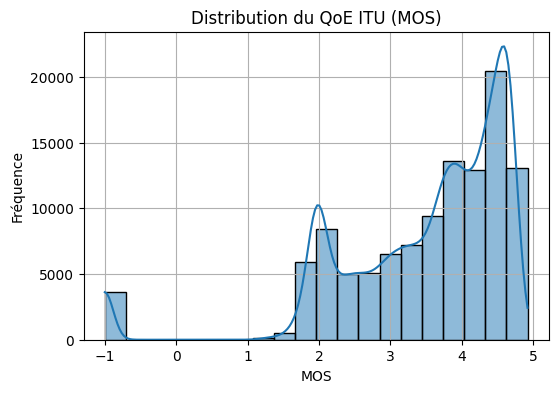

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.histplot(df['QoE_ITU_046'].dropna(), bins=20, kde=True)
plt.title("Distribution du QoE ITU (MOS)")
plt.xlabel("MOS")
plt.ylabel("Fr√©quence")
plt.grid()
plt.show()


Ce qu‚Äôon observe :

- La majorit√© des valeurs sont entre 3,5 et 5, donc la qualit√© per√ßue est globalement bonne.

- Il y a quelques valeurs tr√®s basses (vers -1 ou 0) ‚Üí probablement des erreurs, valeurs manquantes cod√©es bizarrement, ou vid√©os tr√®s d√©grad√©es.

***Corr√©lation entre d√©bit descendant et MOS***

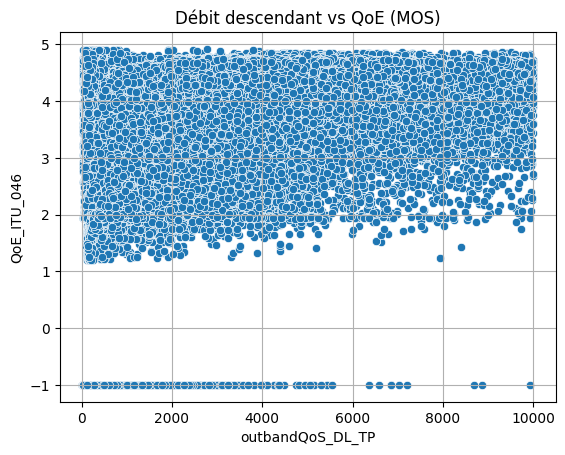

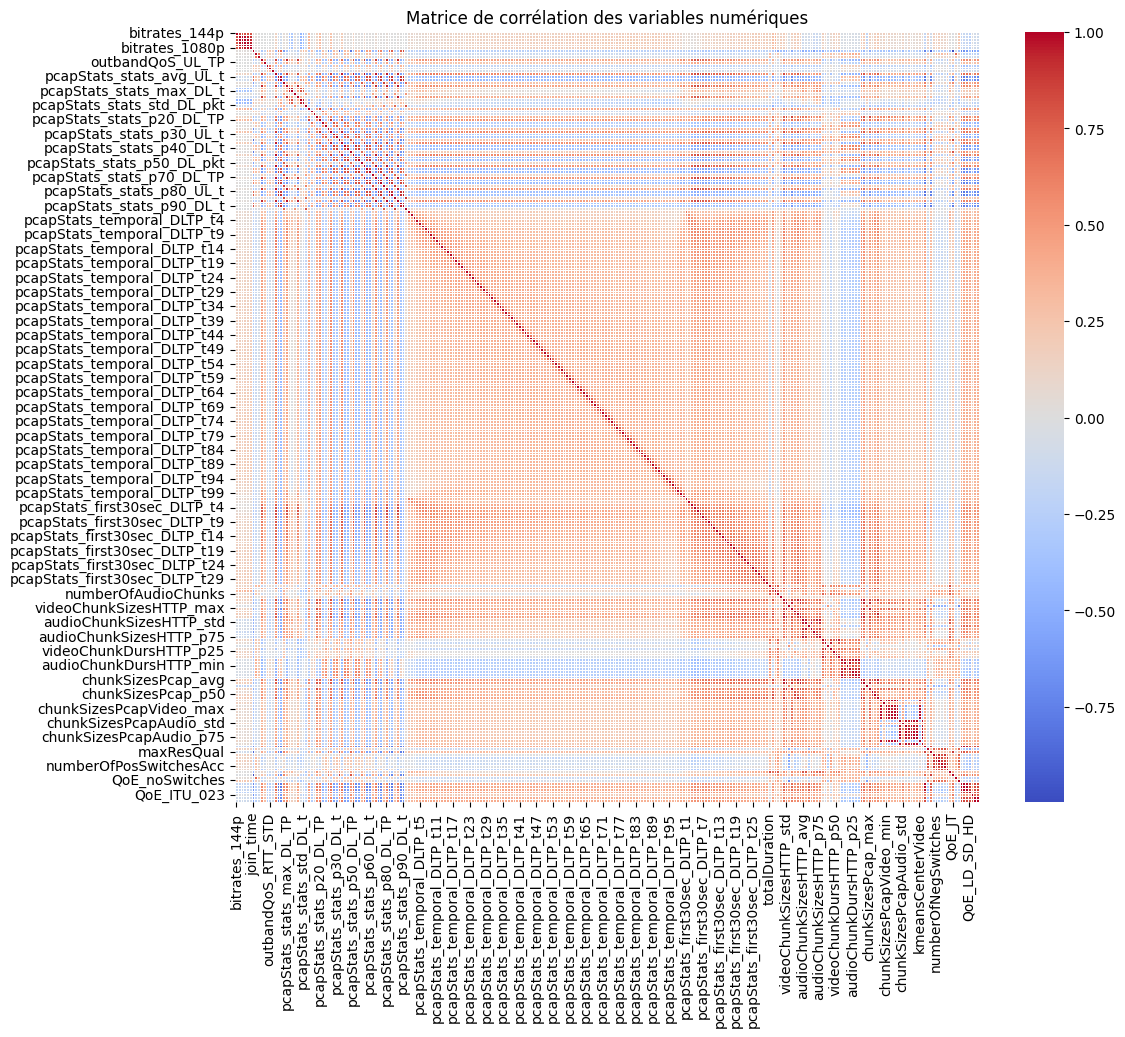

In [12]:
sns.scatterplot(data=df, x='outbandQoS_DL_TP', y='QoE_ITU_046')
plt.title("D√©bit descendant vs QoE (MOS)")
plt.grid()
plt.show()

# Matrice de corr√©lation
corr = df.corr(numeric_only=True)
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Matrice de corr√©lation des variables num√©riques")
plt.show()

la compar√© entre le d√©bit descendant (outbandQoS_DL_TP) avec la QoE montre que La relation n‚Äôest pas lin√©aire : certains cas ont un bon d√©bit mais une mauvaise QoE. Cela montre que d‚Äôautres facteurs jouent.

Plusieurs blocs fortement corr√©l√©s (zones rouges fonc√©es) ‚Üí par exemple les features pcapStats_temporal_DLTP_t* sont redondantes.
Certaines variables sont isol√©es, donc potentiellement informatives seules.

# **Projet QoE ‚Äì S√©ance 2 : R√©gression lin√©aire & Validation**

***S√©lection de la cible et des features***

In [16]:
# Choisir la variable √† pr√©dire
target = "QoE_ITU_046"

# S√©lectionner les features num√©riques uniquement
features = df.select_dtypes(include=["float", "int"]).drop(columns=[target]).columns.tolist()

# Nettoyer les donn√©es : retirer les lignes avec NaN
df_model = df[features + [target]].dropna()

X = df_model[features]
y = df_model[target]


***R√©gression lin√©aire + √âvaluation***

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# S√©parer en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cr√©er et entra√Æner le mod√®le
model = LinearRegression()
model.fit(X_train, y_train)

# Pr√©dictions et RMSE
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"‚úÖ RMSE sur test : {rmse:.3f}")


‚úÖ RMSE sur test : 0.054


***Interpr√©tation des coefficients***

In [20]:
# Affichage des coefficients du mod√®le
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", key=abs, ascending=False)

coef_df.head(10)


Feature  Coefficient
32   pcapStats_stats_p20_DL_t    -1.191529
266               QoE_ITU_035     0.924948
39   pcapStats_stats_p40_UL_t    -0.738246
36   pcapStats_stats_p30_DL_t    -0.565413
31   pcapStats_stats_p20_UL_t     0.477465
48   pcapStats_stats_p60_DL_t     0.411508
258                    QoE_JT    -0.400373
16   pcapStats_stats_avg_DL_t     0.290211
262               QoE_Linear2     0.248375
47   pcapStats_stats_p60_UL_t     0.236182

***Validation crois√©e (5-fold)***

Un coefficient positif signifie : "quand cette feature augmente, le MOS (qualit√© per√ßue) a tendance √† augmenter".

Un coefficient n√©gatif : "quand cette feature augmente, le MOS a tendance √† baisser".

In [21]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Validation crois√©e avec RMSE
scores = cross_val_score(model, X, y, cv=5, scoring='neg_root_mean_squared_error')
print("‚úÖ RMSE moyen (5-fold CV) :", -np.mean(scores))


‚úÖ RMSE moyen (5-fold CV) : 0.05627506474127092


Le mod√®le donne une erreur quadratique moyenne tr√®s faible : 0.054 sur le jeu de test, et 0.056 en validation crois√©e.
Cela montre que les features r√©seau ont un fort pouvoir pr√©dictif sur la QoE, m√™me dans une approche simple.

***Visualisation des vraies vs. pr√©dites***

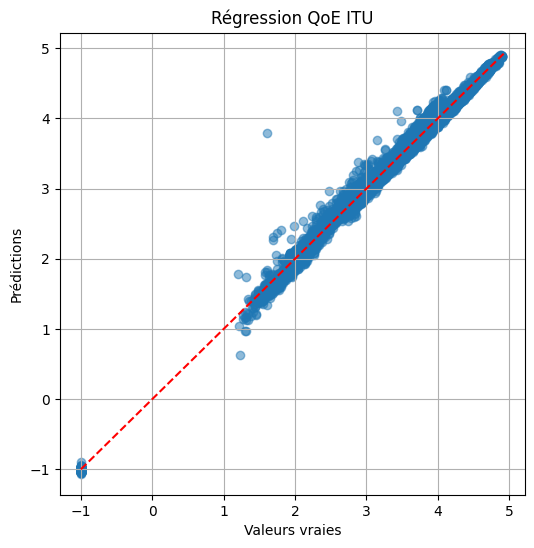

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Valeurs vraies")
plt.ylabel("Pr√©dictions")
plt.title("R√©gression QoE ITU")
plt.grid()
plt.show()


On voit que les pr√©dictions sont tr√®s proches des vraies valeurs.
La ligne rouge est la ligne id√©ale, et les points sont bien align√©s dessus.
Cela confirme les bons r√©sultats chiffr√©s : RMSE = 0.054.

# **Projet QoE ‚Äì S√©ance 3 : Polynomial Regression + Classification**

***R√©gularisation Ridge : comparaison d'alphas***

***Classification binaire : pr√©dire mauvaise QoE***

# **Projet QoE ‚Äì S√©ance 5 : Random Forests and Ensemble Learning**


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Lis les colonnes depuis le fichier .txt
with open("column-names.txt", "r") as f:
    column_names = [line.split('|')[1].strip() for line in f.readlines() if "|" in line and "Field" not in line]

df = pd.read_csv("dataset.csv", header=None, names=column_names)



In [ ]:
target = "QoE_ITU_046"
features = df.select_dtypes(include=["float", "int"]).drop(columns=[target], errors="ignore").columns.tolist()
# On garde les colonnes avec moins de 30% de NaN
valid_features = df[features].isna().mean()[lambda x: x < 0.3].index.tolist()

df_clean = df[valid_features + [target]].dropna()
X = df_clean[valid_features]
y = df_clean[target]

print(f"‚úÖ Donn√©es pr√™tes : {X.shape[0]} lignes, {X.shape[1]} colonnes")


In [ ]:
if X.shape[0] >= 5:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    print(f"RMSE (Random Forest): {rmse:.4f}")

    # Importance des variables
    importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
    plt.figure(figsize=(10,5))
    sns.barplot(x=importances.head(10), y=importances.head(10).index)
    plt.title("Top 10 Features importantes (r√©gression)")
    plt.show()
else:
    print(" Pas assez de donn√©es pour la r√©gression.")


In [ ]:
df["bad_qoe"] = (df["QoE_ITU_046"] < 3).astype(int)
df_class = df[valid_features + ["bad_qoe"]].dropna()
X_class = df_class[valid_features]
y_class = df_class["bad_qoe"]

if X_class.shape[0] >= 5:
    X_train, X_test, y_train, y_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)
    clf = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("\nüìã Rapport de classification (Random Forest):")
    print(classification_report(y_test, y_pred))

    importances = pd.Series(clf.feature_importances_, index=X_class.columns).sort_values(ascending=False)
    plt.figure(figsize=(10,5))
    sns.barplot(x=importances.head(10), y=importances.head(10).index)
    plt.title("Top 10 Features importantes (classification)")
    plt.show()
else:
    print("Pas assez de donn√©es pour la classification.")
